<a href="https://colab.research.google.com/github/NU-MSE-LECTURES/465-WINTER2026/blob/main/Week_02/exercises/exercise_02_hyperspy_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 02: HyperSpy Fundamentals

Practice working with HyperSpy signals, axes, and basic operations.


## Exercise 1: Loading and Inspecting a Signal

**Task:**
1. Import HyperSpy.
2. Create a synthetic 2D image signal (e.g., 100x100 pixels) with some pattern (like a Gaussian).
3. Print the signal's shape, data type, and axes information.
4. Plot the signal.

Shape: (100, 100)
Data type: float64
Axes: <Axes manager, axes: (|100, 100)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
---------------- | ------ | ------ | ------- | ------- | ------ 
     <undefined> |    100 |      0 |       0 |       1 | <undefined> 
     <undefined> |    100 |      0 |       0 |       1 | <undefined> 


C:\Users\elise\miniforge3\envs\matsci465\lib\site-packages\rsciio\utils\rgb_tools.py:62: VisibleDeprecationWarning: The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
  warnings.warn(


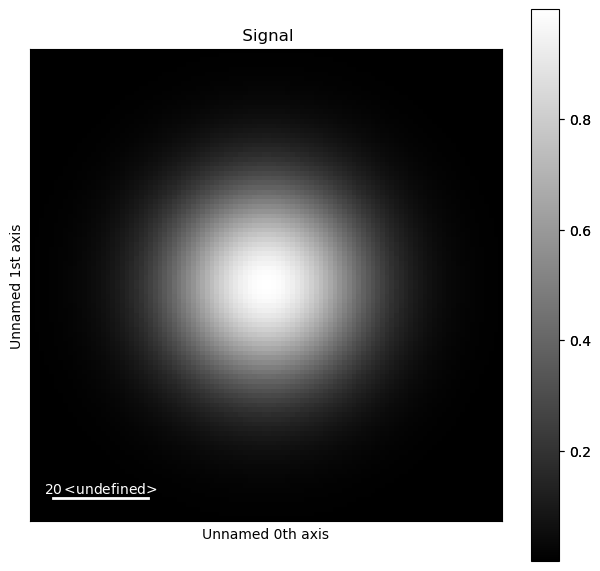

In [7]:
# Your code here
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic 2D image signal
nx, ny = 100, 100
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
X, Y = np.meshgrid(x,y)

# Gaussian parameters
sigma = 0.3
gaussian = np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Create HyperSpy ImageSignal from the numpy array
signal = hs.signals.Signal2D(gaussian)

# Inspect signal
print("Shape:", signal.data.shape)
print("Data type:", signal.data.dtype)
print("Axes:", signal.axes_manager)

signal.plot()

## Exercise 2: Working with Axes

**Task:**
1. Create a 1D signal (e.g., a spectrum) with 1024 points.
2. Set the axis scale to energy (eV) with a scale of 0.1 eV per point and offset of 0.
3. Add some peaks to the spectrum (e.g., Gaussian peaks).
4. Plot the spectrum with proper axis labels.

C:\Users\elise\miniforge3\envs\matsci465\lib\site-packages\rsciio\utils\rgb_tools.py:62: VisibleDeprecationWarning: The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
  warnings.warn(


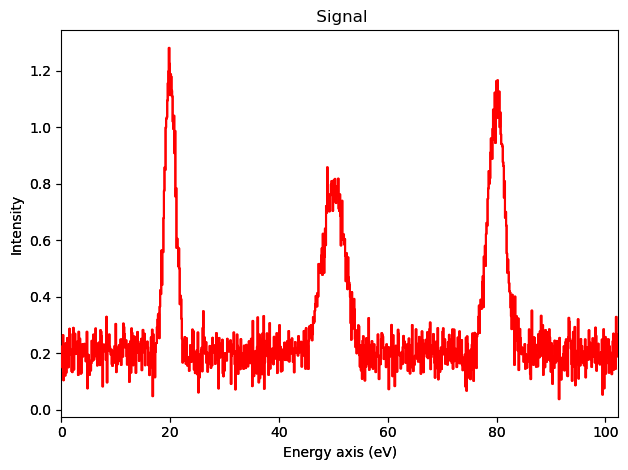

In [8]:
# Problem set-up
import hyperspy.api as hs
import numpy as np

# Create 1D Signal
n_points = 1024
x = np.arange(n_points)

# Create base signal (noise + baseline)
spectrum = np.random.normal(0,0.05,n_points) +0.2

# Set axes
signal = hs.signals.Signal1D(spectrum)

signal.axes_manager[0].scale = 0.1 #eV per point
signal.axes_manager[0].offset = 0.0 # starting energy
signal.axes_manager[0].name = 'Energy'
signal.axes_manager[0].units = 'eV'

# Add Gaussian peaks
def add_peak(center, height, width):
    global spectrum
    spectrum += height * np.exp(-(x - center)**2 / (2 * width**2))

add_peak(200,1.0,10)
add_peak(500,0.6,20)
add_peak(800,0.9,15)

# Update signal we new spectrum data
signal.data = spectrum

signal.plot()

## Exercise 3: Signal Operations

**Task:**
1. Create two 2D signals with different patterns.
2. Perform basic operations: addition, subtraction, multiplication.
3. Apply a filter (e.g., Gaussian blur) to one signal.
4. Compare the original and filtered signals.

C:\Users\elise\miniforge3\envs\matsci465\lib\site-packages\rsciio\utils\rgb_tools.py:62: VisibleDeprecationWarning: The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
  warnings.warn(
C:\Users\elise\miniforge3\envs\matsci465\lib\site-packages\rsciio\utils\rgb_tools.py:62: VisibleDeprecationWarning: The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
  warnings.warn(


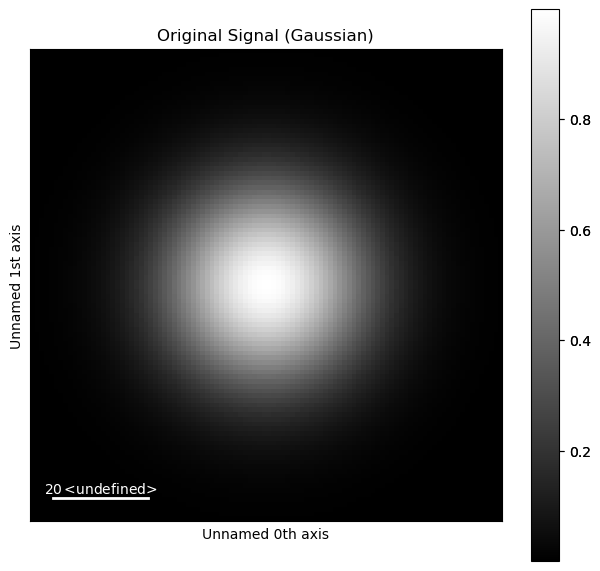

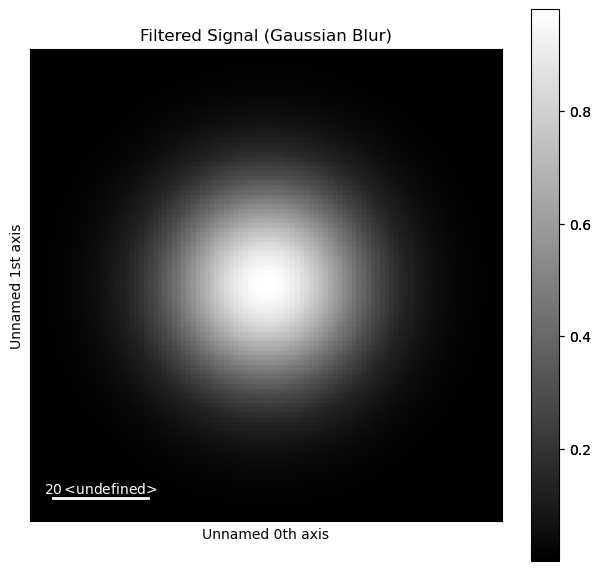

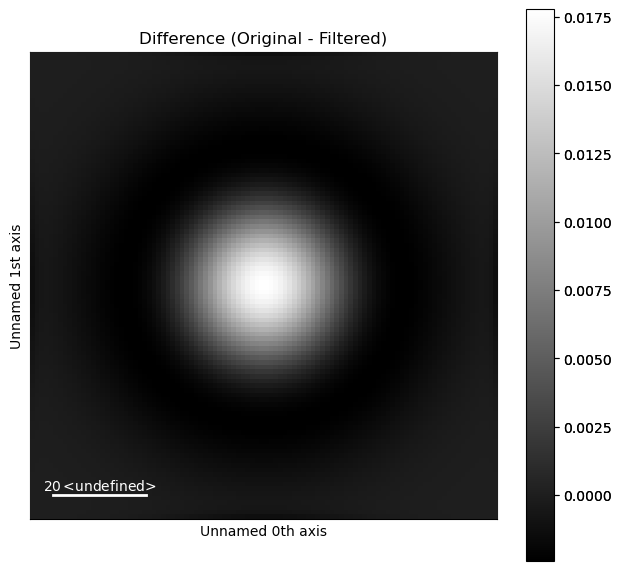

In [12]:
# Problem set-up
import hyperspy.api as hs
import numpy as np
from scipy.ndimage import gaussian_filter

# Create 2D signals
nx, ny = 100, 100
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)

X, Y = np.meshgrid(x, y)

#Pattern 1: Gaussian
sigma1 = 0.3
gaussian = np.exp(-(X**2 + Y**2)/(2 * sigma1**2))

#Patter 2: Sinusoidal
sinusoidal = (np.sin(5*X)*np.sin(5*Y))*0.5+0.5

# Convert to HyperSpy signals
signal1 = hs.signals.Signal2D(gaussian)
signal2 = hs.signals.Signal2D(sinusoidal)

# Perform basic operations
add_signal = signal1 + signal2
sub_signal = signal1 - signal2
mul_signal = signal1 * signal2

# Apply a filter to one signal
filtered_data1 = gaussian_filter(signal1.data, sigma=2)
filtered_signal1 = hs.signals.Signal2D(filtered_data1)

signal1.plot(title="Original Signal (Gaussian)")
filtered_signal1.plot(title="Filtered Signal (Gaussian Blur)")

diff_signal1=signal1 - filtered_signal1
diff_signal1.plot(title="Difference (Original - Filtered)")

## Exercise 4: Saving and Loading

**Task:**
1. Save one of your signals to a file (e.g., .hspy format).
2. Load it back and verify the data is the same.
3. Export a plot as an image file.

Overwrite 'C:\Users\elise\Desktop\MATSCI465_EliseEtrheim\practice\practice_hyperspy_signal.hspy' (y/n)?
 y


Saved signal to practice_hyperspy_signal.hspy
Success! Loaded data matches original.
Saved plot as example_signal_plot.png


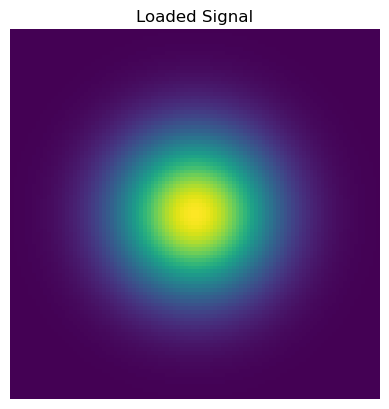

In [14]:
# Problem set-up
import hyperspy.api as hs
import numpy as np
from scipy.ndimage import gaussian_filter

# Copy sample signal (gaussian)
nx, ny = 100, 100
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
X, Y = np.meshgrid(x, y)
gaussian = np.exp(-(X**2 + Y**2) / (2 * 0.3**2))
signal = hs.signals.Signal2D(gaussian)

# Save signal file
file_path = "practice_hyperspy_signal.hspy"
signal.save(file_path)
print(f"Saved signal to {file_path}")

# Load signal file back & verify equality
loaded_signal = hs.load(file_path)
if np.allclose(signal.data, loaded_signal.data):
    print("Success! Loaded data matches original.")
else:
    print("Warning: Loaded data does NOT match original.")

# Explort a plot as an image file
fig, ax = plt.subplots()
ax.imshow(loaded_signal.data,cmap='viridis')
ax.set_title("Loaded Signal")
ax.axis('off')

fig.savefig("example_signal_plot.png",dpi=200)
print("Saved plot as example_signal_plot.png")